# Doğrusal Olmayan Regreson Modelleri

In [188]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

In [6]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

421.6252180741266

In [19]:
r2_score(y_test, y_pred)

0.17880988144588528

In [20]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [23]:
knn = KNeighborsRegressor()

In [24]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [25]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [26]:
knn_cv_model.best_params_["n_neighbors"]

8

In [27]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [28]:
knn_cv_model.best_params_["n_neighbors"]

8

In [29]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [30]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [31]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

In [33]:
r2_score(y_test, knn_tuned.predict(X_test))

0.2093550739421146

# SVR (Destek Vektör Regresyonu)

In [34]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [35]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [42]:
from sklearn.svm import SVR

In [47]:
svr_model = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)

In [56]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [57]:
y_pred = svr_model.predict(X_train)

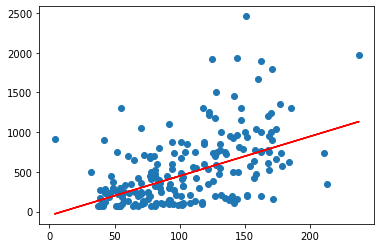

In [58]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [59]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


Text(0, 0.5, 'Maaş (Salary)')

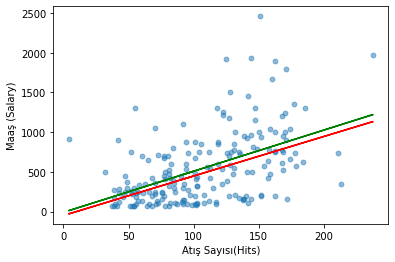

In [61]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [62]:
print ("y = {0} + {1} x".format(svr_model.intercept_, svr_model.coef_)) 

y = [-48.69756098] + [[4.9695122]] x


In [63]:
svr_model.predict([[91]])

array([403.52804878])

In [64]:
y_pred = svr_model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.01879603649684

In [66]:
svr_model

SVR(C=100, gamma='auto', kernel='linear')

## Model Tuning

In [67]:
svr_model

SVR(C=100, gamma='auto', kernel='linear')

In [68]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [70]:
pd.Series(svr_cv_model.best_params_)

C    0.1
dtype: float64

In [72]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [73]:
y_pred = svr_tuned.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [76]:
r2_score(y_test, y_pred)

0.030162956435925148

# Doğrusal Olmayan SVR

In [77]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [78]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
#svr = SVR('rbf', epsilon = eps)
svr = SVR()
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

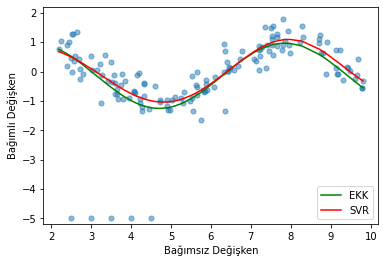

In [79]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [80]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [81]:
svr_rbf = SVR(epsilon=0.1).fit(X_train, y_train)

## Tahmin

In [82]:
y_pred = svr_rbf.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [84]:
svr_rbf

SVR()

In [85]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [86]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [88]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [89]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Çok Katmanlı Algılayıcı

In [90]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [93]:
X_train_scaled = scaler.transform(X_train)

In [94]:
X_test_scaled = scaler.transform(X_test)

In [95]:
from sklearn.neural_network import MLPRegressor

In [96]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [97]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [98]:
mlp_model.n_layers_

4

In [99]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [100]:
y_pred = mlp_model.predict(X_test_scaled)

In [101]:
np.sqrt(mean_squared_error(y_test, y_pred))

527.4270090447499

## Model Tuning

In [102]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [103]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [104]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [105]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [106]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [107]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [108]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [109]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [110]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.7773902246188

# CART

In [111]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [112]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [113]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [115]:
#?cart_model

In [116]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

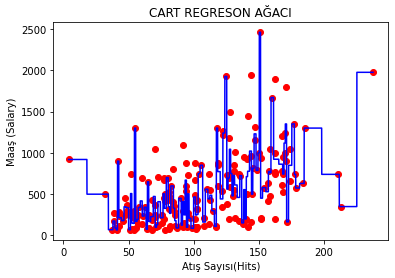

In [117]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [ ]:
#!pip install skompiler

In [118]:
from skompiler import skompile

In [126]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

## Tahmin

In [127]:
x = [91]

In [128]:
((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else ((((328.88899999999995 if x[0] <= 79.0 else 700.0) if 
    x[0] <= 80.5 else 348.75 if x[0] <= 81.5 else 267.5) if x[0] <= 82.5 else
    600.0 if x[0] <= 83.5 else 600.0) if x[0] <= 84.5 else (331.25 if x[0] <=
    85.5 else (180.0 if x[0] <= 86.5 else 91.5) if x[0] <= 88.5 else 450.0 if
    x[0] <= 90.5 else 125.0) if x[0] <= 91.5 else 411.25 if x[0] <= 92.5 else
    250.0) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else ((100.0 if x[0] <=
    95.5 else 504.1665) if x[0] <= 96.5 else 210.0 if x[0] <= 98.0 else 
    87.5) if x[0] <= 100.0 else 466.0) if x[0] <= 101.5 else 247.5 if x[0] <=
    102.5 else 257.3334) if x[0] <= 103.5 else (750.0 if x[0] <= 105.0 else
    850.0) if x[0] <= 107.0 else 162.5 if x[0] <= 109.0 else (560.0 if x[0] <=
    111.0 else 442.5 if x[0] <= 112.5 else 487.5) if x[0] <= 114.0 else 
    300.0) if x[0] <= 116.0 else 110.0) if x[0] <= 117.5 else ((((1300.0 if
    x[0] <= 118.5 else 773.3333333333334 if x[0] <= 120.5 else 442.5) if x[
    0] <= 122.5 else 1240.0 if x[0] <= 124.0 else 1925.571) if x[0] <= 
    125.5 else (561.25 if x[0] <= 126.5 else (695.2776666666667 if x[0] <= 
    127.5 else 1043.75) if x[0] <= 128.5 else (750.0 if x[0] <= 129.5 else 
    480.0) if x[0] <= 130.5 else 726.6666666666666) if x[0] <= 131.5 else (
    ((611.6665 if x[0] <= 133.5 else 461.0) if x[0] <= 135.5 else 725.0) if
    x[0] <= 137.0 else 152.5 if x[0] <= 138.5 else 555.0 if x[0] <= 139.5 else
    200.0) if x[0] <= 140.5 else 712.5 if x[0] <= 141.5 else 777.5) if x[0] <=
    143.0 else (((1021.6666666666666 if x[0] <= 144.5 else 500.0 if x[0] <=
    145.5 else 815.0) if x[0] <= 146.5 else 1230.0 if x[0] <= 148.0 else 
    787.5 if x[0] <= 149.5 else 1000.0) if x[0] <= 150.5 else 2460.0) if x[
    0] <= 151.5 else (451.6666666666667 if x[0] <= 153.0 else 580.0 if x[0] <=
    155.5 else 530.0) if x[0] <= 157.5 else (((((775.0 if x[0] <= 158.5 else
    759.1665) if x[0] <= 159.5 else 1670.0 if x[0] <= 161.5 else 923.0 if x
    [0] <= 165.5 else 863.0556666666666) if x[0] <= 168.5 else 
    743.3333333333334) if x[0] <= 169.5 else 1118.75 if x[0] <= 170.5 else 
    1350.0) if x[0] <= 171.5 else 165.0 if x[0] <= 173.0 else (849.3335 if 
    x[0] <= 175.5 else 1350.0) if x[0] <= 177.5 else (740.0 if x[0] <= 
    178.5 else 575.0 if x[0] <= 181.5 else 630.0) if x[0] <= 185.0 else 
    1300.0 if x[0] <= 198.5 else 740.0) if x[0] <= 212.0 else 350.0) if x[0
    ] <= 225.5 else 1975.0)

125.0

In [129]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [130]:
cart_model.predict([[91]])

array([125.])

In [131]:
y_pred =cart_model.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [133]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [135]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [136]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [137]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [138]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [139]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [140]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [141]:
y_pred = cart_tuned.predict(X_test)

In [142]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

# Bagged Trees Regresyon

In [150]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [152]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [178]:
bag_model.n_estimators

10

In [179]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1666058169),
 DecisionTreeRegressor(random_state=1693520395),
 DecisionTreeRegressor(random_state=631828119),
 DecisionTreeRegressor(random_state=13669423),
 DecisionTreeRegressor(random_state=1275587667),
 DecisionTreeRegressor(random_state=618836772),
 DecisionTreeRegressor(random_state=2126231130),
 DecisionTreeRegressor(random_state=1649860121),
 DecisionTreeRegressor(random_state=1378382291),
 DecisionTreeRegressor(random_state=1990479406)]

In [180]:
bag_model.estimators_samples_

[array([120, 148,  57,  78, 191,  57,  69,  46,  65, 123,  21, 127, 182,
          9, 159, 139,  52, 181, 113,  86, 192,  87,  18,  87,  83,  85,
        113, 157, 112,  78,  99, 186,   4, 172, 155, 133,  37,  69,  86,
        133, 127,  19, 148, 113, 174,  79,  94, 105,   3, 124,   1,  26,
        136,  76,  99, 188, 149, 143,  83,  11,  71, 142, 196, 170,  13,
         15,  92,  44,  53, 171,  41, 117, 174, 189, 120, 107,   9, 185,
         98, 142, 137,  31,  15, 131,  89, 144, 189,  47, 190,  71,  25,
        191, 136, 182,  77,  25,   6, 160,  16,  30, 133,  13, 161,  84,
        123,   4,  19, 120, 169, 107,  56, 170, 128, 140, 117, 160,  91,
        101, 186,  25,  64, 140, 168,  59, 168, 153, 196,  86, 164, 116,
        139,  54,  78, 109, 184,  16, 106, 184, 176,  89, 172,  88, 141,
         15, 100, 134,  56, 115,  64, 122, 187,  76,  23,  50, 101, 130,
        126, 105, 181,   4,  70,  12, 190, 186,  62,  84,   0, 193,  68,
        194,  15, 124,  28,  69, 148, 109,  69, 178

In [181]:
bag_model.estimators_features_

[array([14, 13,  3,  6,  5, 10, 12, 18,  7,  8, 12, 11,  4,  0, 11, 17, 15,
        17, 11]),
 array([11, 18, 16,  6, 17, 18,  2, 17,  7,  7,  7, 18, 12, 10,  4,  4,  5,
        13,  2]),
 array([ 8, 18, 17,  9,  3,  8,  5, 15, 13,  8,  4, 10,  2,  6,  3,  2, 14,
        10, 18]),
 array([15, 17,  6,  0, 11,  5, 12,  5,  7, 10,  8,  3, 13, 15, 12, 11, 17,
         4,  2]),
 array([14, 12,  7, 16, 14, 13, 13,  8,  2,  6,  8, 13,  0,  5,  0, 13, 16,
         3,  6]),
 array([ 4, 17,  5, 15,  4, 15, 17,  3, 13,  0,  0, 16,  3,  0, 15,  2, 14,
        18, 18]),
 array([17,  6, 18, 11,  2,  4, 14,  2, 10,  9,  1,  2, 16, 13,  8, 16,  1,
        11, 14]),
 array([ 6, 10, 12,  3,  5, 17,  3, 11, 18,  3,  7,  2, 12,  6,  1,  4, 12,
        10, 11]),
 array([17,  2, 12, 14, 18,  1,  4,  0,  1,  0,  8,  1,  4, 17,  4,  5, 14,
        16,  9]),
 array([14,  2,  5, 16,  0,  6,  5,  6, 15, 17, 16,  1, 17,  2,  5,  9,  2,
        15, 16])]

In [182]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1693520395)

## Tahmin

In [165]:
y_pred = bag_model.predict(X_test)

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred))

362.22351700093566

In [171]:
iki_y_pred = bag_model.estimators_[2].fit(X_train, y_train).predict(X_test)

In [172]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

454.510326123554

In [173]:
yedi_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

In [174]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

464.56256375632387

# Model Tuning

In [183]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [184]:
bag_params = {"n_estimators": range(2,20)}

In [192]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [193]:
bag_cv_model2 = RandomizedSearchCV(bag_model, bag_params, cv = 10)

In [194]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [195]:
bag_cv_model2.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
                   param_distributions={'n_estimators': range(2, 20)})

In [196]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [198]:
bag_cv_model2.best_params_

{'n_estimators': 14}

In [200]:
bag_tuned = BaggingRegressor( n_estimators = 18)

In [201]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=18)

In [202]:
y_pred = bag_tuned.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.0783058003454

# Random Forests

In [204]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
rf_model = RandomForestRegressor(random_state = 42)

In [207]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [208]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [209]:
y_pred = rf_model.predict(X_test)

In [210]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [211]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [212]:
rf_model = RandomForestRegressor(random_state = 42)

In [213]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [214]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [215]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [216]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [217]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [218]:
y_pred = rf_tuned.predict(X_test)

In [219]:
np.sqrt(mean_squared_error(y_test, y_pred))

341.8762457751007

In [220]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

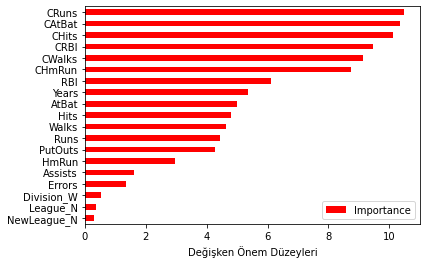

In [221]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [222]:
from sklearn.ensemble import GradientBoostingRegressor

In [223]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [224]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.5800379809503

## Model Tuning

In [225]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [226]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [227]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.75}

In [228]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [229]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

330.83559221632004

In [230]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

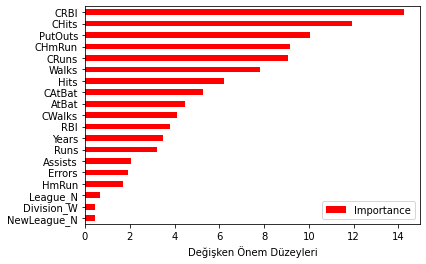

In [231]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [232]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [233]:
#!pip install xgboost

In [234]:
import xgboost as xgb

In [235]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [236]:
from xgboost import XGBRegressor

In [237]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [238]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [239]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [240]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [241]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [242]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [243]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [244]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.4180975078934

# Light GBM

In [245]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [246]:
#!pip install lightgbm

In [247]:
from lightgbm import LGBMRegressor

In [248]:
#conda install -c conda-forge lightgbm

In [249]:
from lightgbm import LGBMRegressor

In [250]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [251]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [252]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [253]:
lgbm_model

LGBMRegressor()

In [254]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [255]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [256]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [257]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [258]:
y_pred = lgbm_tuned.predict(X_test)

In [259]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost

In [260]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [261]:
!pip install catboost

In [262]:
from catboost import CatBoostRegressor

In [263]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 211ms	remaining: 3m 31s
1:	learn: 431.3923642	total: 223ms	remaining: 1m 51s
2:	learn: 424.8820360	total: 229ms	remaining: 1m 16s
3:	learn: 418.2514904	total: 236ms	remaining: 58.8s
4:	learn: 412.6394021	total: 242ms	remaining: 48.1s
5:	learn: 406.6247020	total: 253ms	remaining: 41.9s
6:	learn: 400.5321206	total: 258ms	remaining: 36.5s
7:	learn: 394.6683437	total: 264ms	remaining: 32.7s
8:	learn: 388.2496484	total: 269ms	remaining: 29.6s
9:	learn: 382.9448842	total: 274ms	remaining: 27.2s
10:	learn: 377.2600080	total: 281ms	remaining: 25.3s
11:	learn: 372.4829606	total: 287ms	remaining: 23.6s
12:	learn: 366.6823437	total: 294ms	remaining: 22.3s
13:	learn: 362.6076230	total: 302ms	remaining: 21.3s
14:	learn: 358.0107745	total: 309ms	remaining: 20.3s
15:	learn: 353.2802665	total: 315ms	remaining: 19.4s
16:	learn: 348.5646265	total: 320ms	remaining: 18.5s
17:	learn: 343.6407912	total: 343ms	remaining: 18.7s
18:	learn: 339.2363847	

## Tahmin

In [264]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [265]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [266]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [267]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 3.08ms	remaining: 3.08s
1:	learn: 404.1864276	total: 7.8ms	remaining: 3.89s
2:	learn: 386.3231718	total: 12.1ms	remaining: 4.02s
3:	learn: 370.5548032	total: 16ms	remaining: 3.98s
4:	learn: 354.9242038	total: 21ms	remaining: 4.19s
5:	learn: 342.3403984	total: 24ms	remaining: 3.97s
6:	learn: 328.2370070	total: 26.9ms	remaining: 3.82s
7:	learn: 317.5056526	total: 30.3ms	remaining: 3.76s
8:	learn: 306.6243511	total: 35.1ms	remaining: 3.86s
9:	learn: 297.3147023	total: 38.2ms	remaining: 3.78s
10:	learn: 288.3685892	total: 41.6ms	remaining: 3.74s
11:	learn: 281.0996220	total: 44.9ms	remaining: 3.69s
12:	learn: 273.2254898	total: 49.3ms	remaining: 3.74s
13:	learn: 266.9003385	total: 52.3ms	remaining: 3.69s
14:	learn: 261.9092500	total: 55.9ms	remaining: 3.67s
15:	learn: 256.2637350	total: 58.8ms	remaining: 3.62s
16:	learn: 250.3667935	total: 62.7ms	remaining: 3.63s
17:	learn: 244.8631098	total: 65.2ms	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DF8B1C1310>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [268]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [269]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 16.9ms	remaining: 3.36s
1:	learn: 440.4621805	total: 29ms	remaining: 2.87s
2:	learn: 438.5132091	total: 40.7ms	remaining: 2.67s
3:	learn: 436.2180377	total: 62.2ms	remaining: 3.05s
4:	learn: 434.0461579	total: 81.9ms	remaining: 3.19s
5:	learn: 431.8437770	total: 93.9ms	remaining: 3.04s
6:	learn: 430.1594587	total: 106ms	remaining: 2.91s
7:	learn: 428.0941830	total: 116ms	remaining: 2.78s
8:	learn: 426.0998774	total: 127ms	remaining: 2.7s
9:	learn: 424.0249067	total: 130ms	remaining: 2.46s
10:	learn: 422.1921868	total: 143ms	remaining: 2.46s
11:	learn: 420.2506764	total: 155ms	remaining: 2.43s
12:	learn: 418.3116383	total: 168ms	remaining: 2.41s
13:	learn: 416.2966847	total: 178ms	remaining: 2.36s
14:	learn: 414.5776175	total: 190ms	remaining: 2.34s
15:	learn: 412.8009394	total: 210ms	remaining: 2.42s
16:	learn: 410.9774146	total: 234ms	remaining: 2.52s
17:	learn: 409.1047417	total: 248ms	remaining: 2.51s
18:	learn: 407.6243957	total: 258ms	remaining: 2.46s


In [270]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.6970696250705